In this chapter, we will take a dive into another subcategory of supervised learning: regression analysis.

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')

In [2]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


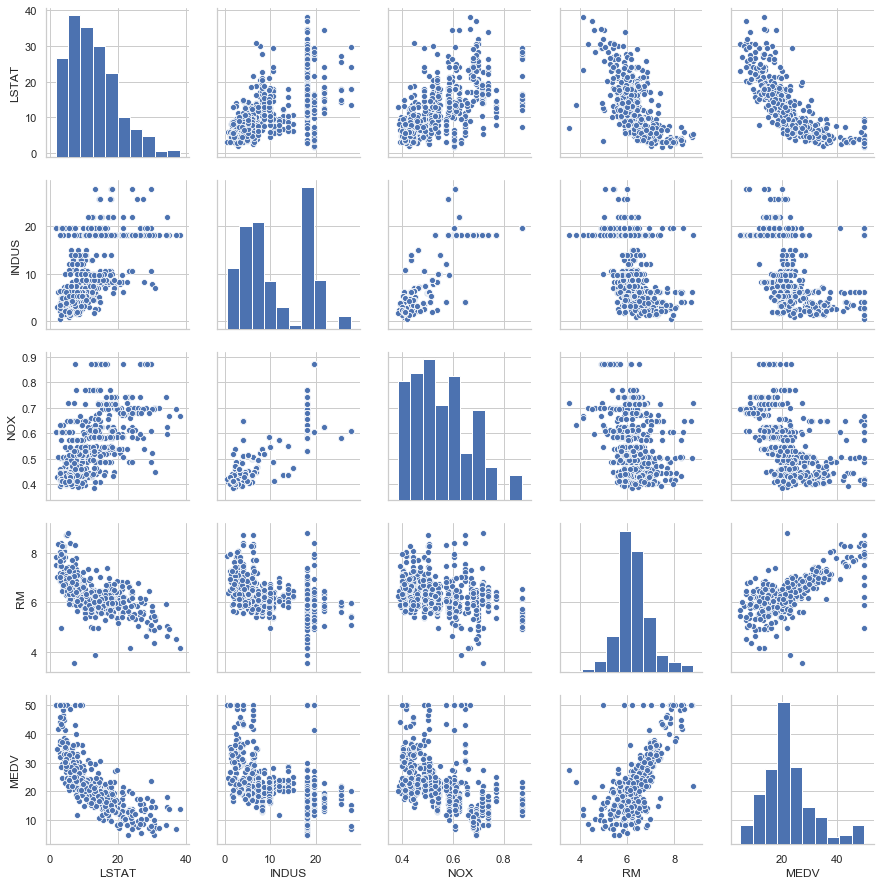

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

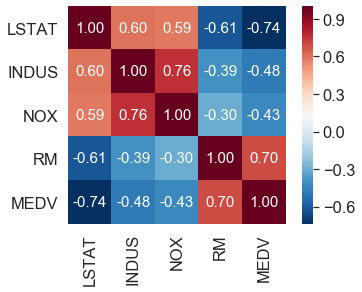

In [7]:
import numpy as np
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

# Ordinary Least Squares (OLS)

In implementation of the ADAptive LInear NEuron (Adaline) cost function is the Sum of Squared Errors (SSE) this is identical to the OLS cost function.

In [46]:
class LinearRegressionGD(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] = self.w_[1:] + self.eta * X.T.dot(errors)
            self.w_[0] = self.w_[0] + self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [50]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    for i in range(n_iter):        
        self._gradient_descent_step(X, y, lr)       
        
    return self

In [51]:
X = df[['RM']].values
y = df['MEDV'].values.reshape(-1, 1)
print(f'Shape X:{X.shape}, shape y:{y.shape}.')

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
print(f'X_std = {X_std.shape}, y_std = {y_std.shape}.')
lr = LinearRegression()
lr.fit(X_std, y_std, n_iter=20, lr=0.001)


Shape X:(506, 1), shape y:(506, 1).
X_std = (506, 1), y_std = (506, 1).


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,506)

In [66]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='white',edgecolor='green')
    plt.plot(X, model.predict(X), color='red')
    return None


In [67]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


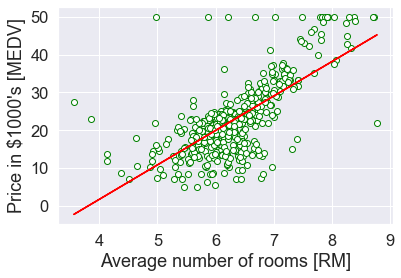

In [68]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [69]:
Xb = np.hstack((np.ones((X.shape[0], 1)), X))

In [74]:
w = np.zeros(X.shape[1])
w.shape

(1,)

In [85]:
z = np.linalg.inv(np.dot(Xb.T, Xb))

In [86]:
w = np.dot(z, np.dot(Xb.T, y))

In [87]:
print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


In [98]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=20,
                        min_samples=50,
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=20, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

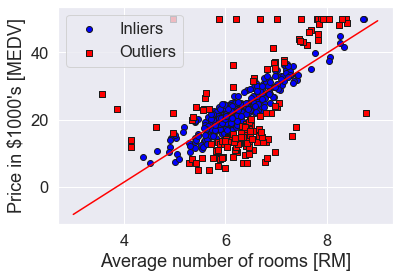

In [116]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        residual_threshold=5.0,
                        random_state=1)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers', edgecolor='k')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='red', marker='s', label='Outliers', edgecolor='k')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [117]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 9.621
Intercept: -37.137


In [120]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

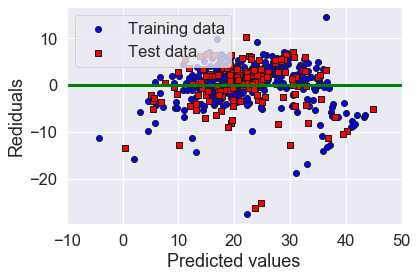

In [124]:
plt.scatter(y_train_pred, y_train_pred-y_train, 
           c='blue', marker='o', edgecolor='k', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='red', marker='s', edgecolor='k', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Rediduals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=3, color='green')
plt.xlim([-10, 50])
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [126]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % 
      (r2_score(y_train, y_train_pred),
      r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673
